In [13]:
import xgboost as xgb
from xgboost import plot_importance 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import RobustScaler
import warnings
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv("eco jeju/final_final_train_0913.csv")

In [18]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [19]:
data.sort_values(by=['base_date'],inplace=True)

In [20]:
data.reset_index(inplace=True)

In [21]:
data.drop(columns=['index'],inplace=True)

In [22]:
data

,base_date,emd_nm,em_g,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop
0,2018-01-01,?�체,85755000,679922.000000,5.358886e+05,3.786578e+09,20891720.0,1.602637e+09,108983.0,1057.0,40848.0,32512.0000,7.210523e+06,830189.130500,54466.952500,2215.223209
1,2018-01-01,?�라??2128300,13829,12662.099970,9.421414e+07,4.369900e+05,48264416.0,2.652000e+03,25.0,1105.0,818.0,250576.3474,2.201221e+04,1377.472688,41.620260,NaN
2,2018-01-01,?�도??3476650,21105,8902.768868,1.373002e+08,3.594120e+05,63631587.0,4.313000e+03,15.0,1979.0,1425.0,112692.7888,1.034117e+04,839.760964,39.834595,NaN
3,2018-01-01,?�담1??1487100,7887,6631.149998,5.763687e+07,4.762700e+05,34621981.0,1.317000e+03,20.0,565.0,532.0,101939.5856,9.363622e+03,601.809124,28.697845,NaN
4,2018-01-01,?�담2??2581850,15916,10504.580160,1.051404e+08,2.911630e+05,43873060.0,3.173000e+03,20.0,1257.0,1052.0,289235.0332,4.461053e+04,1609.868207,139.279035,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50881,2021-06-30,?�산??3380000,16972,13809.659200,8.855328e+07,2.250850e+06,25006846.0,1.720000e+03,101.0,624.0,737.0,250310.9041,2.437996e+04,1612.380993,29.272263,NaN
50882,2021-06-30,?�산??1090000,4510,1787.890608,3.939310e+07,9.687780e+05,14697811.0,7.380000e+02,40.0,302.0,290.0,48343.5386,3.387080e+03,230.594645,14.582817,NaN
50883,2021-06-30,?�라??3565000,39396,42414.120500,2.900830e+08,2.429797e+07,88314326.0,9.149000e+03,1066.0,2590.0,2001.0,383019.4293,1.218797e+05,4231.797354,41.029042,NaN
50884,2021-06-30,?�두??597050,3403,1183.279682,4.068692e+07,1.303776e+06,15029187.0,7.580000e+02,50.0,246.0,292.0,81223.1279,4.625567e+03,349.232990,11.704028,NaN


In [86]:
data.columns[1:]

Index(['emd_nm', 'em_g', 'youth_pop', 'total_frgn_pop', 'total_pop',
       'jeju_resd_pop', 'card_use_amt', 'delivery_amt', 'market_amt',
       'card_use_cnt', 'delivery_cnt', 'market_cnt', 'em_cnt', 'pay_amt',
       'visit_pop', 'work_pop'],
      dtype='object')

# 분포 확인하기

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50886 entries, 0 to 50885
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   base_date       50886 non-null  object 
 1   emd_nm          50886 non-null  object 
 2   em_g            50886 non-null  int64  
 3   total_pop       50886 non-null  int64  
 4   jeju_resd_pop   50886 non-null  float64
 5   card_use_amt    50886 non-null  float64
 6   delivery_amt    50886 non-null  float64
 7   market_amt      50886 non-null  float64
 8   card_use_cnt    50886 non-null  float64
 9   delivery_cnt    50886 non-null  float64
 10  market_cnt      50886 non-null  float64
 11  em_cnt          50886 non-null  int64  
 12  visit_pop       50886 non-null  float64
 13  work_pop        50886 non-null  float64
 14  youth_pop       50886 non-null  float64
 15  total_frgn_pop  50886 non-null  float64
dtypes: float64(11), int64(3), object(2)
memory usage: 6.2+ MB


In [85]:
import seaborn as sns

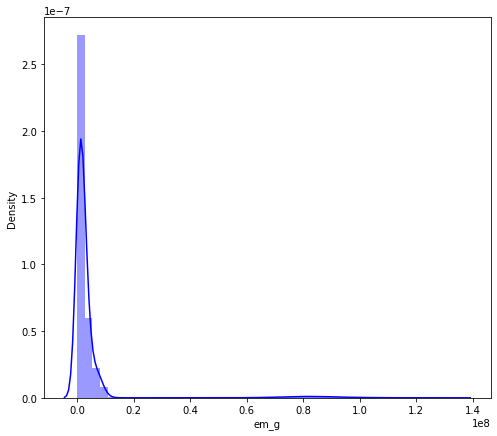

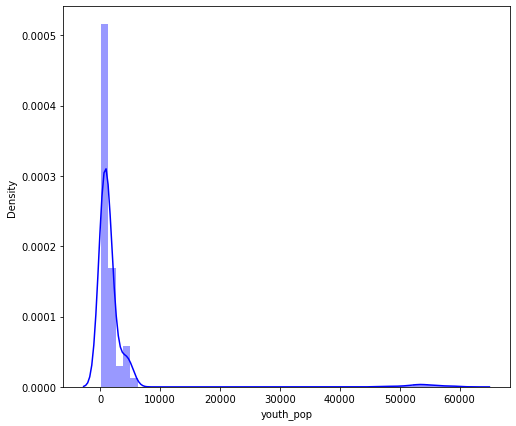

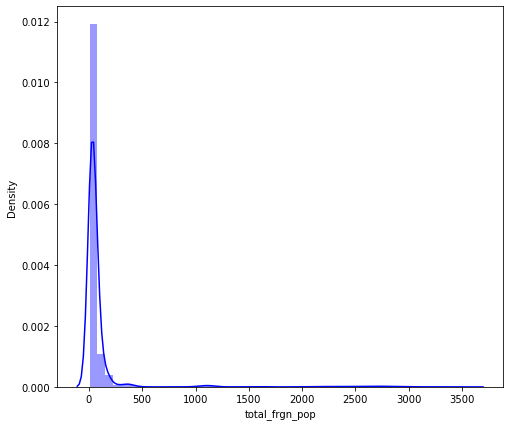

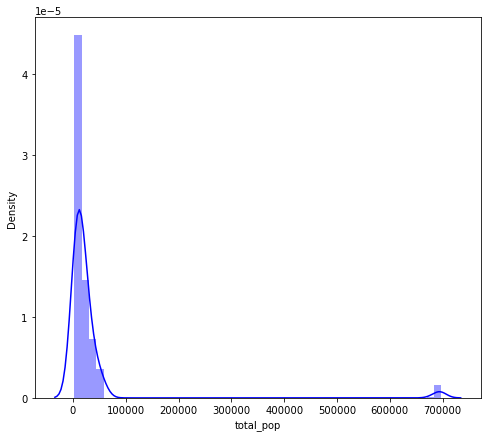

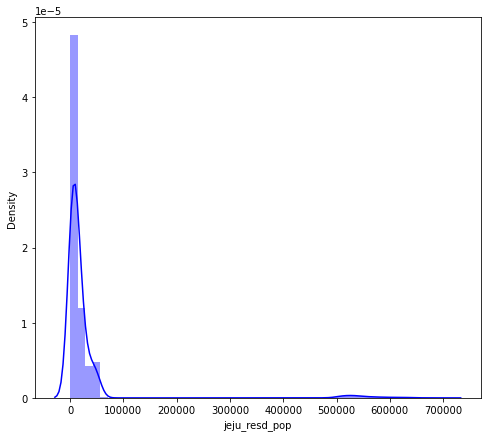

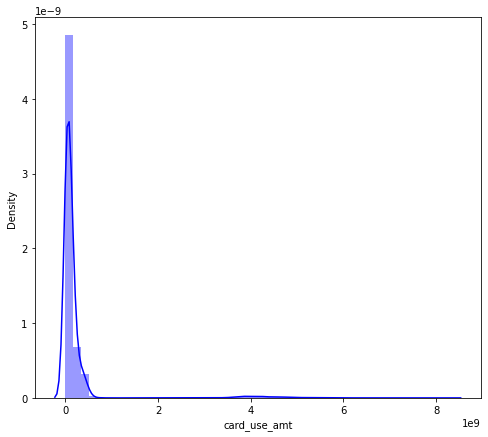

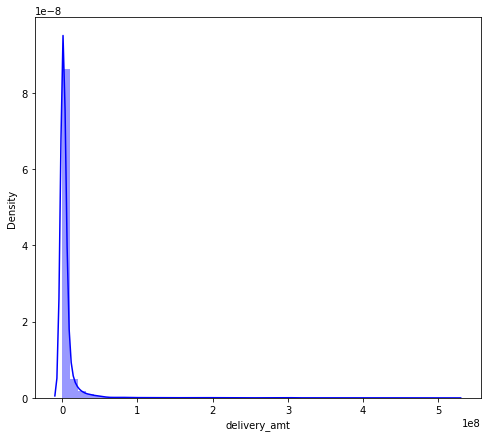

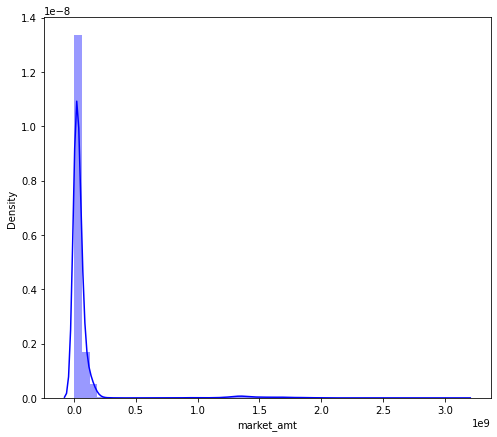

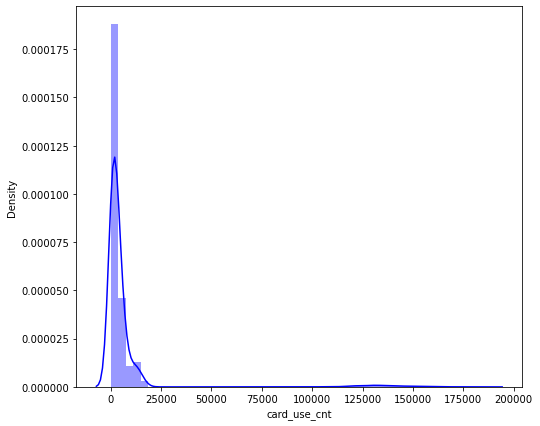

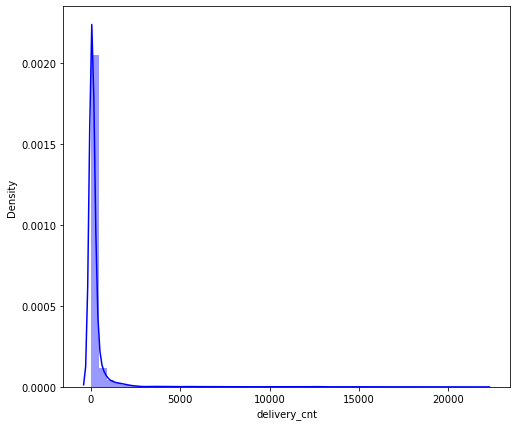

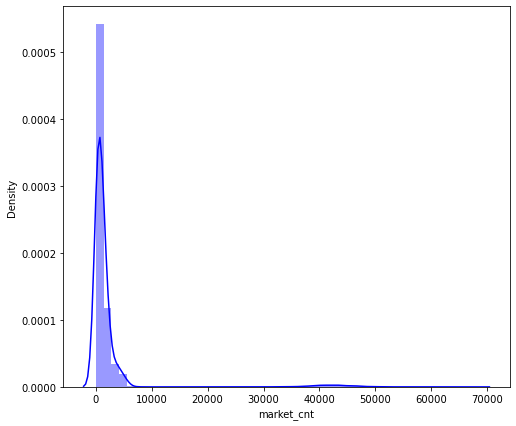

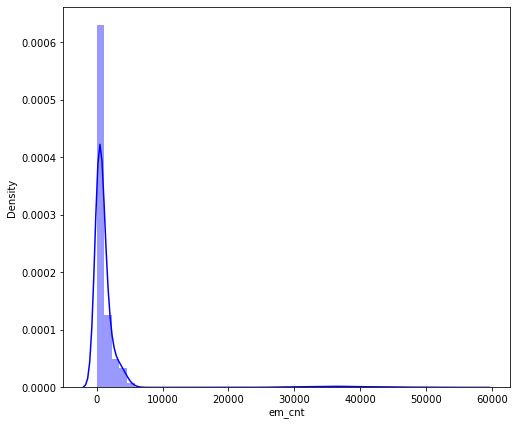

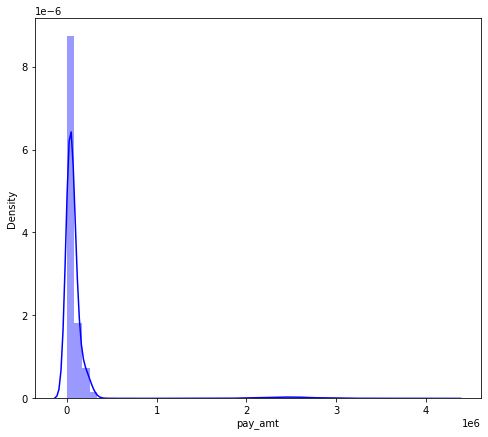

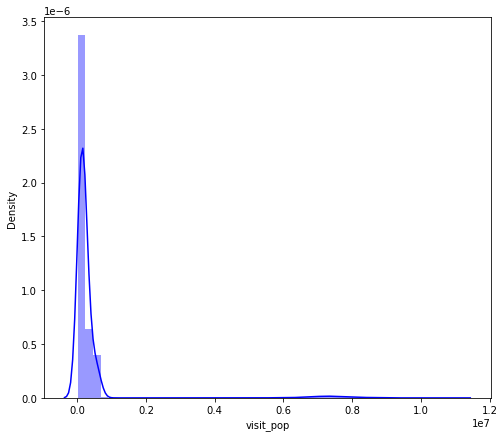

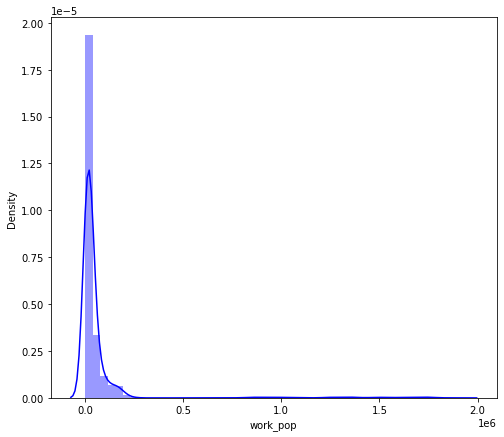

In [95]:
for feature in data.columns[2:]:
    f,ax=plt.subplots(figsize=(8,7))
    sns.distplot(data[feature],color='b')

In [127]:
X_features = data.loc[:, ['youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt',
                                'market_amt', 'card_use_cnt', 'delivery_cnt','market_cnt','em_cnt','pay_amt','visit_pop','work_pop']]
y_label = data.loc[:, 'em_g']

In [125]:
X_features.shape

(50886, 14)

In [128]:
#6월1일까지 train
X_train = X_features.iloc[:49638]
X_valid = X_features.iloc[49638:]
y_train = y_label.iloc[:49638]
y_valid = y_label.loc[49638:]
print(X_train.shape, X_valid.shape,y_train.shape,y_valid.shape)

(49638, 14) (1248, 14) (49638,) (1248,)


In [129]:
scaler = RobustScaler()

scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_valid = scaler.transform(X_valid)

X_scaled_train = pd.DataFrame(X_scaled_train , index = X_train.index , columns = X_train.columns)
X_scaled_valid = pd.DataFrame(X_scaled_valid , index = X_valid.index , columns = X_valid.columns)

In [134]:
dtrain = xgb.DMatrix(data=X_scaled_train, label = y_train)
dtest = xgb.DMatrix(data=X_scaled_valid, label=y_valid)

In [135]:
params = {'max_depth' : 7,
         'eta' : 0.1, 
         'objective' : 'reg:linear',
         'eval_metric' : 'rmsle',
         'early_stoppings' : 100 }
num_rounds = 1000

In [136]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[15:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stoppings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmsle:2.30327	eval-rmsle:2.29799
[1]	train-rmsle:1.66182	eval-rmsle:1.65717
[2]	train-rmsle:1.30748	eval-rmsle:1.30211
[3]	train-rmsle:1.07004	eval-rmsle:1.06488
[4]	train-rmsle:0.89659	eval-rmsle:0.89102
[5]	train-rmsle:0.76323	eval-rmsle:0.75735
[6]	train-rmsle:0.65690	eval-rmsle:0.65038
[7]	train-rmsle:0.57057	eval-rmsle:0.56393
[8]	train-rmsle:0.49902	eval-rmsle:0.49174
[9]	train-rmsle:0.43905	eval-rmsle:0.4310

[172]	train-rmsle:0.06599	eval-rmsle:0.01883
[173]	train-rmsle:0.06599	eval-rmsle:0.01884
[174]	train-rmsle:0.06599	eval-rmsle:0.01883
[175]	train-rmsle:0.06599	eval-rmsle:0.01883
[176]	train-rmsle:0.06599	eval-rmsle:0.01883
[177]	train-rmsle:0.06599	eval-rmsle:0.01883
[178]	train-rmsle:0.06599	eval-rmsle:0.01883
[179]	train-rmsle:0.06592	eval-rmsle:0.01880
[180]	train-rmsle:0.06592	eval-rmsle:0.01880
[181]	train-rmsle:0.06592	eval-rmsle:0.01880
[182]	train-rmsle:0.06592	eval-rmsle:0.01880
[183]	train-rmsle:0.06592	eval-rmsle:0.01880
[184]	train-rmsle:0.06592	eval-rmsle:0.01880
[185]	train-rmsle:0.06592	eval-rmsle:0.01880
[186]	train-rmsle:0.06591	eval-rmsle:0.01879
[187]	train-rmsle:0.06510	eval-rmsle:0.01823
[188]	train-rmsle:0.06510	eval-rmsle:0.01823
[189]	train-rmsle:0.06510	eval-rmsle:0.01822
[190]	train-rmsle:0.06510	eval-rmsle:0.01823
[191]	train-rmsle:0.06510	eval-rmsle:0.01823
[192]	train-rmsle:0.06510	eval-rmsle:0.01816
[193]	train-rmsle:0.06510	eval-rmsle:0.01816
[194]	trai

[355]	train-rmsle:0.05906	eval-rmsle:0.01615
[356]	train-rmsle:0.05901	eval-rmsle:0.01614
[357]	train-rmsle:0.05900	eval-rmsle:0.01614
[358]	train-rmsle:0.05900	eval-rmsle:0.01613
[359]	train-rmsle:0.05900	eval-rmsle:0.01613
[360]	train-rmsle:0.05900	eval-rmsle:0.01613
[361]	train-rmsle:0.05839	eval-rmsle:0.01581
[362]	train-rmsle:0.05839	eval-rmsle:0.01581
[363]	train-rmsle:0.05837	eval-rmsle:0.01581
[364]	train-rmsle:0.05837	eval-rmsle:0.01581
[365]	train-rmsle:0.05836	eval-rmsle:0.01584
[366]	train-rmsle:0.05835	eval-rmsle:0.01586
[367]	train-rmsle:0.05836	eval-rmsle:0.01587
[368]	train-rmsle:0.05827	eval-rmsle:0.01587
[369]	train-rmsle:0.05826	eval-rmsle:0.01586
[370]	train-rmsle:0.05827	eval-rmsle:0.01586
[371]	train-rmsle:0.05827	eval-rmsle:0.01586
[372]	train-rmsle:0.05827	eval-rmsle:0.01586
[373]	train-rmsle:0.05827	eval-rmsle:0.01586
[374]	train-rmsle:0.05827	eval-rmsle:0.01586
[375]	train-rmsle:0.05827	eval-rmsle:0.01586
[376]	train-rmsle:0.05828	eval-rmsle:0.01586
[377]	trai

[538]	train-rmsle:0.05563	eval-rmsle:0.01497
[539]	train-rmsle:0.05563	eval-rmsle:0.01497
[540]	train-rmsle:0.05562	eval-rmsle:0.01497
[541]	train-rmsle:0.05563	eval-rmsle:0.01497
[542]	train-rmsle:0.05563	eval-rmsle:0.01497
[543]	train-rmsle:0.05563	eval-rmsle:0.01499
[544]	train-rmsle:0.05552	eval-rmsle:0.01505
[545]	train-rmsle:0.05552	eval-rmsle:0.01505
[546]	train-rmsle:0.05552	eval-rmsle:0.01505
[547]	train-rmsle:0.05552	eval-rmsle:0.01505
[548]	train-rmsle:0.05552	eval-rmsle:0.01505
[549]	train-rmsle:0.05552	eval-rmsle:0.01505
[550]	train-rmsle:0.05552	eval-rmsle:0.01505
[551]	train-rmsle:0.05559	eval-rmsle:0.01504
[552]	train-rmsle:0.05559	eval-rmsle:0.01504
[553]	train-rmsle:0.05506	eval-rmsle:0.01480
[554]	train-rmsle:0.05506	eval-rmsle:0.01480
[555]	train-rmsle:0.05506	eval-rmsle:0.01480
[556]	train-rmsle:0.05506	eval-rmsle:0.01480
[557]	train-rmsle:0.05506	eval-rmsle:0.01480
[558]	train-rmsle:0.05506	eval-rmsle:0.01480
[559]	train-rmsle:0.05507	eval-rmsle:0.01478
[560]	trai

[903]	train-rmsle:0.05042	eval-rmsle:0.01371
[904]	train-rmsle:0.05043	eval-rmsle:0.01371
[905]	train-rmsle:0.05041	eval-rmsle:0.01370
[906]	train-rmsle:0.05041	eval-rmsle:0.01370
[907]	train-rmsle:0.05041	eval-rmsle:0.01374
[908]	train-rmsle:0.05042	eval-rmsle:0.01374
[909]	train-rmsle:0.05042	eval-rmsle:0.01374
[910]	train-rmsle:0.05042	eval-rmsle:0.01374
[911]	train-rmsle:0.05042	eval-rmsle:0.01374
[912]	train-rmsle:0.05038	eval-rmsle:0.01375
[913]	train-rmsle:0.05038	eval-rmsle:0.01374
[914]	train-rmsle:0.05038	eval-rmsle:0.01374
[915]	train-rmsle:0.05038	eval-rmsle:0.01373
[916]	train-rmsle:0.05004	eval-rmsle:0.01373
[917]	train-rmsle:0.05004	eval-rmsle:0.01373
[918]	train-rmsle:0.05004	eval-rmsle:0.01373
[919]	train-rmsle:0.05004	eval-rmsle:0.01373
[920]	train-rmsle:0.05003	eval-rmsle:0.01373
[921]	train-rmsle:0.05004	eval-rmsle:0.01374
[922]	train-rmsle:0.05004	eval-rmsle:0.01374
[923]	train-rmsle:0.05004	eval-rmsle:0.01374
[924]	train-rmsle:0.04967	eval-rmsle:0.01365
[925]	trai

In [137]:
pred = model.predict(dtest)
pred

array([2511544.5 ,  932048.4 , 5644085.5 , ..., 3561257.  ,  599243.5 ,
       1007184.06], dtype=float32)

In [138]:
predict = pd.DataFrame(pred, columns=['predict'])
predict

,predict
0,2.511544e+06
1,9.320484e+05
2,5.644086e+06
3,3.304311e+06
4,1.585654e+06
...,...
1243,3.411614e+06
1244,1.091056e+06
1245,3.561257e+06
1246,5.992435e+05


In [139]:
predict['y']=np.array(y_valid)

In [140]:
predict['predict']=predict['predict'].astype('int')

In [141]:
predict

,predict,y
0,2511544,2509350
1,932048,928050
2,5644085,5635900
3,3304310,3296450
4,1585653,1582000
...,...,...
1243,3411613,3380000
1244,1091055,1090000
1245,3561257,3565000
1246,599243,597050


In [153]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

print(np.sqrt(mean_squared_error(predict['predict'],predict['y'])))
print(mean_absolute_error(predict['predict'],predict['y']))
print(r2_score(predict['predict'],y_valid))

66987.31044613518
16172.810096153846
0.9999765368912015


# amt 제거해서 해보기

In [177]:
X_features = data.loc[:, ['youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt',
                                'market_amt', 'card_use_cnt', 'delivery_cnt','market_cnt','em_cnt'
                          ,'visit_pop','work_pop']]
y_label = data.loc[:, 'em_g']

In [178]:
X_features.shape

(50886, 13)

In [179]:
#6월1일까지 train
X_train = X_features.iloc[:49638]
X_valid = X_features.iloc[49638:]
y_train = y_label.iloc[:49638]
y_valid = y_label.loc[49638:]
print(X_train.shape, X_valid.shape,y_train.shape,y_valid.shape)

(49638, 13) (1248, 13) (49638,) (1248,)


In [167]:
scaler = RobustScaler()

scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_valid = scaler.transform(X_valid)

X_scaled_train = pd.DataFrame(X_scaled_train , index = X_train.index , columns = X_train.columns)
X_scaled_valid = pd.DataFrame(X_scaled_valid , index = X_valid.index , columns = X_valid.columns)

In [180]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_valid, label=y_valid)

In [181]:
params = {'max_depth' : 7,
         'eta' : 0.1, 
         'objective' : 'reg:linear',
         'eval_metric' : 'rmsle',
         'early_stoppings' : 100 }
num_rounds = 1000

In [182]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[15:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stoppings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmsle:2.29332	eval-rmsle:2.24642
[1]	train-rmsle:1.65290	eval-rmsle:1.60801
[2]	train-rmsle:1.29991	eval-rmsle:1.25626
[3]	train-rmsle:1.06474	eval-rmsle:1.03014
[4]	train-rmsle:0.89397	eval-rmsle:0.86106
[5]	train-rmsle:0.76234	eval-rmsle:0.73258
[6]	train-rmsle:0.65915	eval-rmsle:0.63194
[7]	train-rmsle:0.57558	eval-rmsle:0.55065
[8]	train-rmsle:0.50779	eval-rmsle:0.48311
[9]	train-rmsle:0.45168	eval-rmsle:0.4292

[172]	train-rmsle:nan	eval-rmsle:0.12564
[173]	train-rmsle:nan	eval-rmsle:0.12565
[174]	train-rmsle:nan	eval-rmsle:0.12561
[175]	train-rmsle:nan	eval-rmsle:0.12502
[176]	train-rmsle:nan	eval-rmsle:0.12502
[177]	train-rmsle:nan	eval-rmsle:0.12502
[178]	train-rmsle:nan	eval-rmsle:0.12502
[179]	train-rmsle:nan	eval-rmsle:0.12502
[180]	train-rmsle:nan	eval-rmsle:0.12367
[181]	train-rmsle:nan	eval-rmsle:0.12362
[182]	train-rmsle:nan	eval-rmsle:0.12362
[183]	train-rmsle:nan	eval-rmsle:0.12303
[184]	train-rmsle:nan	eval-rmsle:0.12306
[185]	train-rmsle:nan	eval-rmsle:0.12305
[186]	train-rmsle:nan	eval-rmsle:0.12275
[187]	train-rmsle:nan	eval-rmsle:0.12219
[188]	train-rmsle:nan	eval-rmsle:0.12219
[189]	train-rmsle:nan	eval-rmsle:0.12220
[190]	train-rmsle:nan	eval-rmsle:0.12220
[191]	train-rmsle:nan	eval-rmsle:0.12220
[192]	train-rmsle:nan	eval-rmsle:0.12247
[193]	train-rmsle:nan	eval-rmsle:0.12266
[194]	train-rmsle:nan	eval-rmsle:0.12266
[195]	train-rmsle:nan	eval-rmsle:0.12210
[196]	train-rmsl

[372]	train-rmsle:nan	eval-rmsle:0.10952
[373]	train-rmsle:nan	eval-rmsle:0.10930
[374]	train-rmsle:nan	eval-rmsle:0.10960
[375]	train-rmsle:nan	eval-rmsle:0.10955
[376]	train-rmsle:nan	eval-rmsle:0.10955
[377]	train-rmsle:nan	eval-rmsle:0.10946
[378]	train-rmsle:nan	eval-rmsle:0.10969
[379]	train-rmsle:nan	eval-rmsle:0.10968
[380]	train-rmsle:nan	eval-rmsle:0.10969
[381]	train-rmsle:nan	eval-rmsle:0.10962
[382]	train-rmsle:nan	eval-rmsle:0.10963
[383]	train-rmsle:nan	eval-rmsle:0.10961
[384]	train-rmsle:nan	eval-rmsle:0.10961
[385]	train-rmsle:nan	eval-rmsle:0.10958
[386]	train-rmsle:nan	eval-rmsle:0.10958
[387]	train-rmsle:nan	eval-rmsle:0.10958
[388]	train-rmsle:nan	eval-rmsle:0.10958
[389]	train-rmsle:nan	eval-rmsle:0.10958
[390]	train-rmsle:nan	eval-rmsle:0.10958
[391]	train-rmsle:nan	eval-rmsle:0.10959
[392]	train-rmsle:nan	eval-rmsle:0.10959
[393]	train-rmsle:nan	eval-rmsle:0.10959
[394]	train-rmsle:nan	eval-rmsle:0.10959
[395]	train-rmsle:nan	eval-rmsle:0.10960
[396]	train-rmsl

[572]	train-rmsle:nan	eval-rmsle:0.10848
[573]	train-rmsle:nan	eval-rmsle:0.10848
[574]	train-rmsle:nan	eval-rmsle:0.10832
[575]	train-rmsle:nan	eval-rmsle:0.10844
[576]	train-rmsle:nan	eval-rmsle:0.10833
[577]	train-rmsle:nan	eval-rmsle:0.10865
[578]	train-rmsle:nan	eval-rmsle:0.10864
[579]	train-rmsle:nan	eval-rmsle:0.10855
[580]	train-rmsle:nan	eval-rmsle:0.10864
[581]	train-rmsle:nan	eval-rmsle:0.10864
[582]	train-rmsle:nan	eval-rmsle:0.10862
[583]	train-rmsle:nan	eval-rmsle:0.10857
[584]	train-rmsle:nan	eval-rmsle:0.10887
[585]	train-rmsle:nan	eval-rmsle:0.10890
[586]	train-rmsle:nan	eval-rmsle:0.10898
[587]	train-rmsle:nan	eval-rmsle:0.10897
[588]	train-rmsle:nan	eval-rmsle:0.10898
[589]	train-rmsle:nan	eval-rmsle:0.10898
[590]	train-rmsle:nan	eval-rmsle:0.10900
[591]	train-rmsle:nan	eval-rmsle:0.10899
[592]	train-rmsle:nan	eval-rmsle:0.10899
[593]	train-rmsle:nan	eval-rmsle:0.10899
[594]	train-rmsle:nan	eval-rmsle:0.10899
[595]	train-rmsle:nan	eval-rmsle:0.10896
[596]	train-rmsl

[772]	train-rmsle:nan	eval-rmsle:0.12349
[773]	train-rmsle:nan	eval-rmsle:0.12346
[774]	train-rmsle:nan	eval-rmsle:0.12339
[775]	train-rmsle:nan	eval-rmsle:0.12342
[776]	train-rmsle:nan	eval-rmsle:0.12339
[777]	train-rmsle:nan	eval-rmsle:0.12337
[778]	train-rmsle:nan	eval-rmsle:0.12323
[779]	train-rmsle:nan	eval-rmsle:0.12325
[780]	train-rmsle:nan	eval-rmsle:0.12320
[781]	train-rmsle:nan	eval-rmsle:0.12319
[782]	train-rmsle:nan	eval-rmsle:0.12318
[783]	train-rmsle:nan	eval-rmsle:0.12318
[784]	train-rmsle:nan	eval-rmsle:0.12318
[785]	train-rmsle:nan	eval-rmsle:0.12318
[786]	train-rmsle:nan	eval-rmsle:0.12312
[787]	train-rmsle:nan	eval-rmsle:0.12312
[788]	train-rmsle:nan	eval-rmsle:0.12312
[789]	train-rmsle:nan	eval-rmsle:0.12311
[790]	train-rmsle:nan	eval-rmsle:0.12312
[791]	train-rmsle:nan	eval-rmsle:0.12311
[792]	train-rmsle:nan	eval-rmsle:0.12352
[793]	train-rmsle:nan	eval-rmsle:0.12345
[794]	train-rmsle:nan	eval-rmsle:0.12214
[795]	train-rmsle:nan	eval-rmsle:0.12243
[796]	train-rmsl

[961]	train-rmsle:0.09491	eval-rmsle:0.11284
[962]	train-rmsle:0.09491	eval-rmsle:0.11284
[963]	train-rmsle:0.09491	eval-rmsle:0.11285
[964]	train-rmsle:0.09491	eval-rmsle:0.11285
[965]	train-rmsle:0.09491	eval-rmsle:0.11285
[966]	train-rmsle:0.09490	eval-rmsle:0.11284
[967]	train-rmsle:0.09490	eval-rmsle:0.11285
[968]	train-rmsle:0.09490	eval-rmsle:0.11285
[969]	train-rmsle:0.09491	eval-rmsle:0.11285
[970]	train-rmsle:0.09493	eval-rmsle:0.11286
[971]	train-rmsle:0.09494	eval-rmsle:0.11298
[972]	train-rmsle:0.09493	eval-rmsle:0.11301
[973]	train-rmsle:0.09492	eval-rmsle:0.11301
[974]	train-rmsle:0.09492	eval-rmsle:0.11302
[975]	train-rmsle:0.09489	eval-rmsle:0.11301
[976]	train-rmsle:0.09483	eval-rmsle:0.11299
[977]	train-rmsle:0.09483	eval-rmsle:0.11294
[978]	train-rmsle:0.09482	eval-rmsle:0.11293
[979]	train-rmsle:0.09481	eval-rmsle:0.11295
[980]	train-rmsle:0.09481	eval-rmsle:0.11295
[981]	train-rmsle:0.09479	eval-rmsle:0.11295
[982]	train-rmsle:0.09479	eval-rmsle:0.11295
[983]	trai

In [183]:
pred = model.predict(dtest)
pred

array([3001666.  , 1084382.4 , 6207911.  , ..., 3851567.2 ,  747827.56,
       1021555.06], dtype=float32)

In [184]:
predict = pd.DataFrame(pred, columns=['predict'])
predict

,predict
0,3.001666e+06
1,1.084382e+06
2,6.207911e+06
3,3.519711e+06
4,1.601009e+06
...,...
1243,2.790868e+06
1244,1.084035e+06
1245,3.851567e+06
1246,7.478276e+05


In [185]:
predict['y']=np.array(y_valid)

In [186]:
predict['predict']=predict['predict'].astype('int')

In [187]:
predict

,predict,y
0,3001666,2509350
1,1084382,928050
2,6207911,5635900
3,3519710,3296450
4,1601008,1582000
...,...,...
1243,2790867,3380000
1244,1084034,1090000
1245,3851567,3565000
1246,747827,597050


In [188]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(np.sqrt(mean_squared_error(predict['predict'],predict['y'])))
print(mean_absolute_error(predict['predict'],predict['y']))
print(r2_score(predict['predict'],y_valid))

537301.7717765102
218759.62099358975
0.9985280530037126


# base date encoder

In [23]:
X_features = data.loc[:, ['base_date','youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt',
                                'market_amt', 'card_use_cnt', 'delivery_cnt','market_cnt','em_cnt','visit_pop','work_pop']]
y_label = data.loc[:, 'em_g']

In [24]:
from sklearn.preprocessing import OrdinalEncoder
order=OrdinalEncoder()
X_features['base_date']=order.fit_transform(X_features['base_date'].values.reshape(-1,1))

In [25]:
X_features

,base_date,youth_pop,total_frgn_pop,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop
0,0.0,54466.952500,2215.223209,679922.000000,5.358886e+05,3.786578e+09,20891720.0,1.602637e+09,108983.0,1057.0,40848.0,32512.0000,7.210523e+06,830189.130500
1,0.0,41.620260,NaN,12662.099970,9.421414e+07,4.369900e+05,48264416.0,2.652000e+03,25.0,1105.0,818.0,250576.3474,2.201221e+04,1377.472688
2,0.0,39.834595,NaN,8902.768868,1.373002e+08,3.594120e+05,63631587.0,4.313000e+03,15.0,1979.0,1425.0,112692.7888,1.034117e+04,839.760964
3,0.0,28.697845,NaN,6631.149998,5.763687e+07,4.762700e+05,34621981.0,1.317000e+03,20.0,565.0,532.0,101939.5856,9.363622e+03,601.809124
4,0.0,139.279035,NaN,10504.580160,1.051404e+08,2.911630e+05,43873060.0,3.173000e+03,20.0,1257.0,1052.0,289235.0332,4.461053e+04,1609.868207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50881,1276.0,29.272263,NaN,13809.659200,8.855328e+07,2.250850e+06,25006846.0,1.720000e+03,101.0,624.0,737.0,250310.9041,2.437996e+04,1612.380993
50882,1276.0,14.582817,NaN,1787.890608,3.939310e+07,9.687780e+05,14697811.0,7.380000e+02,40.0,302.0,290.0,48343.5386,3.387080e+03,230.594645
50883,1276.0,41.029042,NaN,42414.120500,2.900830e+08,2.429797e+07,88314326.0,9.149000e+03,1066.0,2590.0,2001.0,383019.4293,1.218797e+05,4231.797354
50884,1276.0,11.704028,NaN,1183.279682,4.068692e+07,1.303776e+06,15029187.0,7.580000e+02,50.0,246.0,292.0,81223.1279,4.625567e+03,349.232990


In [523]:
X_features.shape

(50886, 14)

In [524]:
#6월1일까지 train
X_train = X_features.iloc[:49638]
X_valid = X_features.iloc[49638:]
y_train = y_label.iloc[:49638]
y_valid = y_label.loc[49638:]
print(X_train.shape, X_valid.shape,y_train.shape,y_valid.shape)

(49638, 14) (1248, 14) (49638,) (1248,)


In [525]:
scaler = RobustScaler()

X_train[['youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt','delivery_cnt',
                                'market_amt', 'card_use_cnt','market_cnt','em_cnt','visit_pop','work_pop']] = scaler.fit_transform(X_train[['youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt','delivery_cnt',
                                'market_amt', 'card_use_cnt','market_cnt','em_cnt','visit_pop','work_pop']])
X_valid[['youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt','delivery_cnt',
                                'market_amt', 'card_use_cnt','market_cnt','em_cnt','visit_pop','work_pop']] = scaler.transform(X_valid[['youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt','delivery_cnt',
                                'market_amt', 'card_use_cnt','market_cnt','em_cnt','visit_pop','work_pop']])

X_scaled_train = pd.DataFrame(X_train , index = X_train.index , columns = X_train.columns)
X_scaled_valid = pd.DataFrame(X_valid , index = X_valid.index , columns = X_valid.columns)

In [526]:
dtrain = xgb.DMatrix(data=X_scaled_train, label = y_train)
dtest = xgb.DMatrix(data=X_scaled_valid, label=y_valid)

In [527]:
params = {'eta':0.1,
                   'n_estimators':6000,
                   'max_depth':10,
                    'min_child_weight':0,
                    'gamma':0.5,
                    'subsample':0.5,
                    'colsample_bytree':0.7,
                    'random_state':42,
         'early_stoppings' : 100 }
num_rounds = 1000

In [528]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[19:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stoppings", "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:12248413.00000	eval-rmse:13034099.00000
[1]	train-rmse:11045874.00000	eval-rmse:11704979.00000
[2]	train-rmse:9963159.00000	eval-rmse:10616460.00000
[3]	train-rmse:8980797.00000	eval-rmse:9553166.00000
[4]	train-rmse:8100070.00000	eval-rmse:8610428.00000
[5]	train-rmse:7310923.00000	eval-rmse:7718328.00000
[6]	train-rmse:6606833.00000	eval-rmse:7184812.00000
[7]	train-rmse:5965574.50000	eval-rmse:6494761.00000
[8]	train-rmse:5388754.50000	eval-rmse:5857662.00000
[9]	train-rmse:4884416.00000	eval-rmse:5350457.50000
[10]	train-rmse:4427253.00000	eval-rmse:5069648.50000


[148]	train-rmse:121807.78906	eval-rmse:701449.06250
[149]	train-rmse:121461.67188	eval-rmse:701036.93750
[150]	train-rmse:121270.57812	eval-rmse:701069.75000
[151]	train-rmse:121186.60156	eval-rmse:701214.87500
[152]	train-rmse:120875.89844	eval-rmse:698238.87500
[153]	train-rmse:119737.86719	eval-rmse:697989.75000
[154]	train-rmse:119152.75781	eval-rmse:697991.93750
[155]	train-rmse:118908.67969	eval-rmse:697762.00000
[156]	train-rmse:118384.39062	eval-rmse:696936.81250
[157]	train-rmse:117509.91406	eval-rmse:696741.87500
[158]	train-rmse:116954.40625	eval-rmse:698031.75000
[159]	train-rmse:116657.65625	eval-rmse:697632.06250
[160]	train-rmse:115827.42969	eval-rmse:697564.62500
[161]	train-rmse:115572.31250	eval-rmse:698075.87500
[162]	train-rmse:115415.15625	eval-rmse:697535.31250
[163]	train-rmse:114887.33594	eval-rmse:697562.00000
[164]	train-rmse:114258.93750	eval-rmse:697255.75000
[165]	train-rmse:113765.46875	eval-rmse:697116.18750
[166]	train-rmse:113491.27344	eval-rmse:697911

[305]	train-rmse:76858.60938	eval-rmse:696862.18750
[306]	train-rmse:76645.07812	eval-rmse:696695.62500
[307]	train-rmse:76578.40625	eval-rmse:696778.00000
[308]	train-rmse:76381.14844	eval-rmse:696722.00000
[309]	train-rmse:76111.86719	eval-rmse:696725.93750
[310]	train-rmse:76018.55469	eval-rmse:696760.68750
[311]	train-rmse:75935.85156	eval-rmse:696764.50000
[312]	train-rmse:75671.08594	eval-rmse:696730.93750
[313]	train-rmse:75557.21094	eval-rmse:696716.75000
[314]	train-rmse:75376.88281	eval-rmse:696575.81250
[315]	train-rmse:75244.00781	eval-rmse:696567.62500
[316]	train-rmse:75120.60938	eval-rmse:696626.50000
[317]	train-rmse:74939.63281	eval-rmse:696623.18750
[318]	train-rmse:74766.88281	eval-rmse:696765.87500
[319]	train-rmse:74684.71094	eval-rmse:696791.43750
[320]	train-rmse:74518.29688	eval-rmse:696770.68750
[321]	train-rmse:74335.03906	eval-rmse:696732.56250
[322]	train-rmse:74181.65625	eval-rmse:696786.50000
[323]	train-rmse:74103.69531	eval-rmse:696691.43750
[324]	train-

[463]	train-rmse:56553.16406	eval-rmse:697647.25000
[464]	train-rmse:56440.25781	eval-rmse:697634.56250
[465]	train-rmse:56386.91406	eval-rmse:697645.81250
[466]	train-rmse:56317.55859	eval-rmse:697642.75000
[467]	train-rmse:56207.30859	eval-rmse:697649.56250
[468]	train-rmse:56057.69922	eval-rmse:697648.31250
[469]	train-rmse:55935.77734	eval-rmse:697676.37500
[470]	train-rmse:55818.37109	eval-rmse:697781.81250
[471]	train-rmse:55725.39062	eval-rmse:697752.12500
[472]	train-rmse:55606.94141	eval-rmse:697744.75000
[473]	train-rmse:55513.31250	eval-rmse:697731.56250
[474]	train-rmse:55420.07812	eval-rmse:697695.43750
[475]	train-rmse:55302.89062	eval-rmse:697661.93750
[476]	train-rmse:55218.05078	eval-rmse:697653.93750
[477]	train-rmse:55094.37500	eval-rmse:697640.12500
[478]	train-rmse:55017.80859	eval-rmse:697644.81250
[479]	train-rmse:54892.97266	eval-rmse:697552.93750
[480]	train-rmse:54784.64453	eval-rmse:697548.43750
[481]	train-rmse:54684.64062	eval-rmse:697530.56250
[482]	train-

[621]	train-rmse:42830.96875	eval-rmse:697817.68750
[622]	train-rmse:42793.98438	eval-rmse:697815.50000
[623]	train-rmse:42698.98828	eval-rmse:697813.62500
[624]	train-rmse:42608.93359	eval-rmse:697808.06250
[625]	train-rmse:42528.00781	eval-rmse:697802.00000
[626]	train-rmse:42429.33984	eval-rmse:697803.93750
[627]	train-rmse:42367.95312	eval-rmse:697787.43750
[628]	train-rmse:42320.96484	eval-rmse:697812.37500
[629]	train-rmse:42289.26953	eval-rmse:697952.50000
[630]	train-rmse:42248.50391	eval-rmse:697987.68750
[631]	train-rmse:42200.92969	eval-rmse:697991.75000
[632]	train-rmse:42172.52344	eval-rmse:698048.81250
[633]	train-rmse:42086.92578	eval-rmse:698126.93750
[634]	train-rmse:41996.51562	eval-rmse:698140.81250
[635]	train-rmse:41910.48438	eval-rmse:698147.00000
[636]	train-rmse:41828.64062	eval-rmse:698135.68750
[637]	train-rmse:41785.88672	eval-rmse:698129.81250
[638]	train-rmse:41693.79297	eval-rmse:698096.43750
[639]	train-rmse:41601.80078	eval-rmse:698124.00000
[640]	train-

[779]	train-rmse:33549.10156	eval-rmse:698439.87500
[780]	train-rmse:33502.64453	eval-rmse:698443.56250
[781]	train-rmse:33432.91406	eval-rmse:698447.68750
[782]	train-rmse:33396.12109	eval-rmse:698440.25000
[783]	train-rmse:33331.28906	eval-rmse:698429.50000
[784]	train-rmse:33272.04297	eval-rmse:698438.43750
[785]	train-rmse:33235.80469	eval-rmse:698432.75000
[786]	train-rmse:33205.35547	eval-rmse:698469.81250
[787]	train-rmse:33145.52344	eval-rmse:698476.56250
[788]	train-rmse:33070.08594	eval-rmse:698475.06250
[789]	train-rmse:33036.07422	eval-rmse:698473.93750
[790]	train-rmse:32979.46484	eval-rmse:698490.31250
[791]	train-rmse:32943.62891	eval-rmse:698494.06250
[792]	train-rmse:32909.61719	eval-rmse:698472.31250
[793]	train-rmse:32810.74609	eval-rmse:698484.18750
[794]	train-rmse:32773.99609	eval-rmse:698520.43750
[795]	train-rmse:32759.30078	eval-rmse:698517.37500
[796]	train-rmse:32719.66406	eval-rmse:698529.50000
[797]	train-rmse:32687.29102	eval-rmse:698527.93750
[798]	train-

In [529]:
pred = model.predict(dtest)
pred

array([2909929.2, 1094461.1, 6067777. , ..., 3878783. ,  681564.3,
       1096067.6], dtype=float32)

In [530]:
predict = pd.DataFrame(pred, columns=['predict'])
predict

,predict
0,2.909929e+06
1,1.094461e+06
2,6.067777e+06
3,3.515003e+06
4,1.421222e+06
...,...
1243,2.434934e+06
1244,9.571471e+05
1245,3.878783e+06
1246,6.815643e+05


In [531]:
predict['y']=np.array(y_valid)

In [532]:
predict['predict']=predict['predict'].astype('int')

In [533]:
predict

,predict,y
0,2909929,2509350
1,1094461,928050
2,6067777,5635900
3,3515003,3296450
4,1421221,1582000
...,...,...
1243,2434934,3380000
1244,957147,1090000
1245,3878783,3565000
1246,681564,597050


In [534]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(np.sqrt(mean_squared_error(predict['predict'],predict['y'])))
print(mean_absolute_error(predict['predict'],predict['y']))
print(r2_score(y_valid,predict['predict']))
##encoding+scaling이 가장 점수 좋음

698598.353239526
245354.42147435897
0.9974494085078127


In [ ]:
##'learning_rate':0.1,
                   'n_estimators':6000,
                   'max_depth':10,
                    'min_child_weight':0,
                    'gamma':0.5,
                    'subsample':0.5,
                    'colsample_bytree':0.7,
                    'random_state':42,
         'early_stoppings' : 100 }
            699918.3734341853
238667.4078525641
0.9973422257129103

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

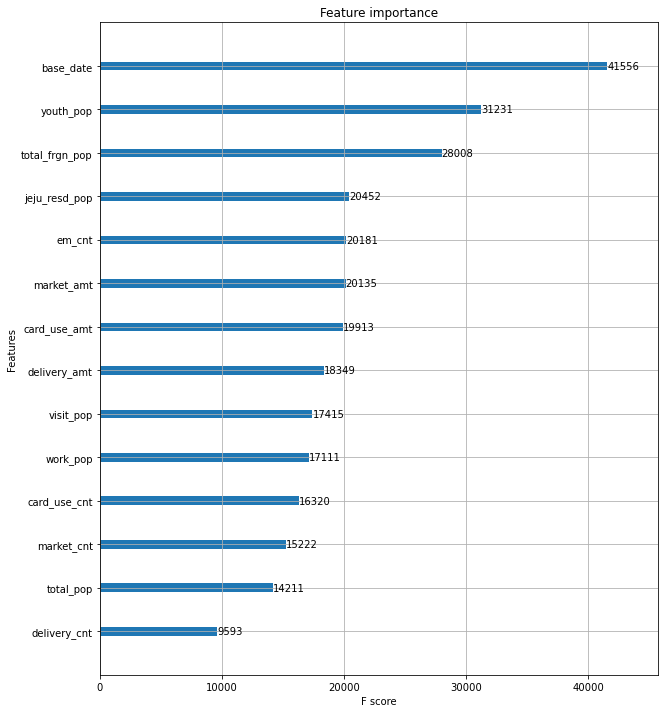

In [535]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

# delivery 제거

In [507]:
X_features = data.loc[:, ['base_date','youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt',
                                'market_amt', 'card_use_cnt','market_cnt','em_cnt','visit_pop','work_pop']]
y_label = data.loc[:, 'em_g']

In [508]:
from sklearn.preprocessing import OrdinalEncoder
order=OrdinalEncoder()
X_features['base_date']=order.fit_transform(X_features['base_date'].values.reshape(-1,1))

In [509]:
X_features.shape

(50886, 13)

In [510]:
#6월1일까지 train
X_train = X_features.iloc[:49638]
X_valid = X_features.iloc[49638:]
y_train = y_label.iloc[:49638]
y_valid = y_label.loc[49638:]
print(X_train.shape, X_valid.shape,y_train.shape,y_valid.shape)

(49638, 13) (1248, 13) (49638,) (1248,)


In [511]:
scaler = RobustScaler()

X_train[['youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt',
                                'market_amt', 'card_use_cnt','market_cnt','em_cnt','visit_pop','work_pop']] = scaler.fit_transform(X_train[['youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt',
                                'market_amt', 'card_use_cnt','market_cnt','em_cnt','visit_pop','work_pop']])
X_valid[['youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt',
                                'market_amt', 'card_use_cnt','market_cnt','em_cnt','visit_pop','work_pop']] = scaler.transform(X_valid[['youth_pop', 'total_frgn_pop', 'total_pop', 
                                'jeju_resd_pop', 'card_use_amt', 'delivery_amt',
                                'market_amt', 'card_use_cnt','market_cnt','em_cnt','visit_pop','work_pop']])

X_scaled_train = pd.DataFrame(X_train , index = X_train.index , columns = X_train.columns)
X_scaled_valid = pd.DataFrame(X_valid , index = X_valid.index , columns = X_valid.columns)

In [512]:
dtrain = xgb.DMatrix(data=X_scaled_train, label = y_train)
dtest = xgb.DMatrix(data=X_scaled_valid, label=y_valid)

In [513]:
params = {'learning_rate':0.1,
                   'n_estimators':6000,
                   'max_depth':10,
                    'min_child_weight':0,
                    'gamma':0.5,
                    'subsample':0.5,
                    'colsample_bytree':0.7,
                    'random_state':42,
         'early_stoppings' : 100}
num_rounds = 1000

In [514]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[19:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stoppings", "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:12248422.00000	eval-rmse:13034097.00000
[1]	train-rmse:11045869.00000	eval-rmse:11704996.00000
[2]	train-rmse:9961042.00000	eval-rmse:10537329.00000
[3]	train-rmse:8988578.00000	eval-rmse:9552923.00000
[4]	train-rmse:8106324.00000	eval-rmse:8618964.00000
[5]	train-rmse:7317951.00000	eval-rmse:7729434.50000
[6]	train-rmse:6606415.50000	eval-rmse:6929583.00000
[7]	train-rmse:5964786.00000	eval-rmse:6241394.00000
[8]	train-rmse:5388515.50000	eval-rmse:5603069.00000
[9]	train-rmse:4872451.00000	eval-rmse:5007897.50000
[10]	train-rmse:4410757.50000	eval-rmse:4517094.00000


[148]	train-rmse:121257.29688	eval-rmse:536985.87500
[149]	train-rmse:120087.03906	eval-rmse:536541.87500
[150]	train-rmse:119895.72656	eval-rmse:536058.93750
[151]	train-rmse:119521.11719	eval-rmse:536262.18750
[152]	train-rmse:118949.76562	eval-rmse:536079.25000
[153]	train-rmse:118037.41406	eval-rmse:536504.06250
[154]	train-rmse:117701.68750	eval-rmse:535945.87500
[155]	train-rmse:117510.37500	eval-rmse:535280.68750
[156]	train-rmse:116927.53906	eval-rmse:535433.06250
[157]	train-rmse:116588.12500	eval-rmse:535439.37500
[158]	train-rmse:115855.17969	eval-rmse:534476.68750
[159]	train-rmse:115300.07031	eval-rmse:534544.50000
[160]	train-rmse:114359.10156	eval-rmse:534817.31250
[161]	train-rmse:113933.96875	eval-rmse:535577.37500
[162]	train-rmse:113825.39062	eval-rmse:535525.37500
[163]	train-rmse:113358.05469	eval-rmse:535688.68750
[164]	train-rmse:112807.28125	eval-rmse:535430.87500
[165]	train-rmse:111977.19531	eval-rmse:535861.93750
[166]	train-rmse:111810.17188	eval-rmse:535946

[305]	train-rmse:74916.75781	eval-rmse:539887.93750
[306]	train-rmse:74820.42969	eval-rmse:539670.93750
[307]	train-rmse:74750.72656	eval-rmse:539780.18750
[308]	train-rmse:74557.77344	eval-rmse:539791.75000
[309]	train-rmse:74341.86719	eval-rmse:539721.87500
[310]	train-rmse:74208.53125	eval-rmse:539698.31250
[311]	train-rmse:74127.13281	eval-rmse:539410.68750
[312]	train-rmse:74043.08594	eval-rmse:539387.12500
[313]	train-rmse:73903.03906	eval-rmse:539392.93750
[314]	train-rmse:73701.70312	eval-rmse:539483.50000
[315]	train-rmse:73492.11719	eval-rmse:539558.12500
[316]	train-rmse:73426.06250	eval-rmse:539673.12500
[317]	train-rmse:73259.16406	eval-rmse:539623.56250
[318]	train-rmse:73160.96875	eval-rmse:539612.25000
[319]	train-rmse:72997.70312	eval-rmse:539578.50000
[320]	train-rmse:72833.71875	eval-rmse:539696.18750
[321]	train-rmse:72717.17188	eval-rmse:539724.00000
[322]	train-rmse:72641.36719	eval-rmse:539812.06250
[323]	train-rmse:72558.57031	eval-rmse:539850.00000
[324]	train-

[463]	train-rmse:55805.44141	eval-rmse:541341.25000
[464]	train-rmse:55699.84766	eval-rmse:541345.18750
[465]	train-rmse:55598.10156	eval-rmse:541359.31250
[466]	train-rmse:55488.03125	eval-rmse:541400.00000
[467]	train-rmse:55395.04297	eval-rmse:541384.12500
[468]	train-rmse:55274.00391	eval-rmse:541418.81250
[469]	train-rmse:55146.16797	eval-rmse:541439.25000
[470]	train-rmse:55057.91797	eval-rmse:541437.75000
[471]	train-rmse:54902.64844	eval-rmse:541415.00000
[472]	train-rmse:54874.05859	eval-rmse:541405.50000
[473]	train-rmse:54824.78906	eval-rmse:541501.81250
[474]	train-rmse:54786.39844	eval-rmse:541563.12500
[475]	train-rmse:54647.24219	eval-rmse:541561.75000
[476]	train-rmse:54592.06250	eval-rmse:541557.62500
[477]	train-rmse:54564.84766	eval-rmse:541721.25000
[478]	train-rmse:54436.30469	eval-rmse:541698.12500
[479]	train-rmse:54374.53125	eval-rmse:541699.12500
[480]	train-rmse:54238.03125	eval-rmse:541609.93750
[481]	train-rmse:54156.99219	eval-rmse:541619.56250
[482]	train-

[621]	train-rmse:42774.17578	eval-rmse:541967.06250
[622]	train-rmse:42699.74609	eval-rmse:541972.68750
[623]	train-rmse:42677.58594	eval-rmse:541840.12500
[624]	train-rmse:42560.03516	eval-rmse:541843.68750
[625]	train-rmse:42471.60156	eval-rmse:541814.75000
[626]	train-rmse:42360.32422	eval-rmse:541818.37500
[627]	train-rmse:42291.91406	eval-rmse:541854.12500
[628]	train-rmse:42185.86719	eval-rmse:541866.25000
[629]	train-rmse:42117.83984	eval-rmse:541855.31250
[630]	train-rmse:42080.71875	eval-rmse:541796.87500
[631]	train-rmse:42032.57812	eval-rmse:541761.87500
[632]	train-rmse:41890.15234	eval-rmse:541713.37500
[633]	train-rmse:41815.73438	eval-rmse:541706.68750
[634]	train-rmse:41740.41797	eval-rmse:541755.75000
[635]	train-rmse:41707.97266	eval-rmse:541753.93750
[636]	train-rmse:41671.25781	eval-rmse:541770.87500
[637]	train-rmse:41614.69922	eval-rmse:541716.18750
[638]	train-rmse:41538.86719	eval-rmse:541719.06250
[639]	train-rmse:41514.94531	eval-rmse:541895.12500
[640]	train-

[779]	train-rmse:33341.63672	eval-rmse:542537.62500
[780]	train-rmse:33299.91016	eval-rmse:542552.62500
[781]	train-rmse:33223.71094	eval-rmse:542545.31250
[782]	train-rmse:33182.30859	eval-rmse:542525.12500
[783]	train-rmse:33111.53516	eval-rmse:542536.93750
[784]	train-rmse:33055.87891	eval-rmse:542548.06250
[785]	train-rmse:32993.46484	eval-rmse:542603.00000
[786]	train-rmse:32929.20312	eval-rmse:542563.31250
[787]	train-rmse:32884.32422	eval-rmse:542518.37500
[788]	train-rmse:32813.01172	eval-rmse:542526.00000
[789]	train-rmse:32792.97266	eval-rmse:542455.18750
[790]	train-rmse:32733.36523	eval-rmse:542458.12500
[791]	train-rmse:32661.60352	eval-rmse:542458.75000
[792]	train-rmse:32620.82617	eval-rmse:542503.25000
[793]	train-rmse:32532.21680	eval-rmse:542488.37500
[794]	train-rmse:32455.55469	eval-rmse:542512.93750
[795]	train-rmse:32395.16797	eval-rmse:542544.81250
[796]	train-rmse:32366.09375	eval-rmse:542534.37500
[797]	train-rmse:32333.74023	eval-rmse:542527.06250
[798]	train-

[937]	train-rmse:26397.77148	eval-rmse:542529.68750
[938]	train-rmse:26367.83008	eval-rmse:542524.87500
[939]	train-rmse:26320.04297	eval-rmse:542540.93750
[940]	train-rmse:26296.71094	eval-rmse:542555.93750
[941]	train-rmse:26255.74805	eval-rmse:542543.56250
[942]	train-rmse:26192.16016	eval-rmse:542540.75000
[943]	train-rmse:26156.02148	eval-rmse:542538.81250
[944]	train-rmse:26114.69727	eval-rmse:542556.50000
[945]	train-rmse:26066.98242	eval-rmse:542552.43750
[946]	train-rmse:26022.06641	eval-rmse:542560.06250
[947]	train-rmse:25979.42969	eval-rmse:542563.75000
[948]	train-rmse:25933.72266	eval-rmse:542580.37500
[949]	train-rmse:25898.35156	eval-rmse:542579.00000
[950]	train-rmse:25856.87695	eval-rmse:542577.12500
[951]	train-rmse:25818.54883	eval-rmse:542609.93750
[952]	train-rmse:25781.40039	eval-rmse:542594.43750
[953]	train-rmse:25725.41211	eval-rmse:542618.00000
[954]	train-rmse:25677.26172	eval-rmse:542616.43750
[955]	train-rmse:25645.08984	eval-rmse:542609.25000
[956]	train-

In [515]:
pred = model.predict(dtest)
pred

array([3032439.5, 1006461.5, 6100947. , ..., 3752745.2,  703977.5,
        984316.9], dtype=float32)

In [516]:
predict = pd.DataFrame(pred, columns=['predict'])
predict

,predict
0,3.032440e+06
1,1.006462e+06
2,6.100947e+06
3,3.555398e+06
4,1.448974e+06
...,...
1243,2.392006e+06
1244,9.757408e+05
1245,3.752745e+06
1246,7.039775e+05


In [517]:
predict['y']=np.array(y_valid)

In [518]:
predict['predict']=predict['predict'].astype('int')

In [519]:
predict

,predict,y
0,3032439,2509350
1,1006461,928050
2,6100947,5635900
3,3555398,3296450
4,1448974,1582000
...,...,...
1243,2392006,3380000
1244,975740,1090000
1245,3752745,3565000
1246,703977,597050


In [520]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(np.sqrt(mean_squared_error(predict['predict'],predict['y'])))
print(mean_absolute_error(predict['predict'],predict['y']))
print(r2_score(predict['predict'],y_valid))

542699.1467236248
207678.38541666666
0.9984756650273572


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

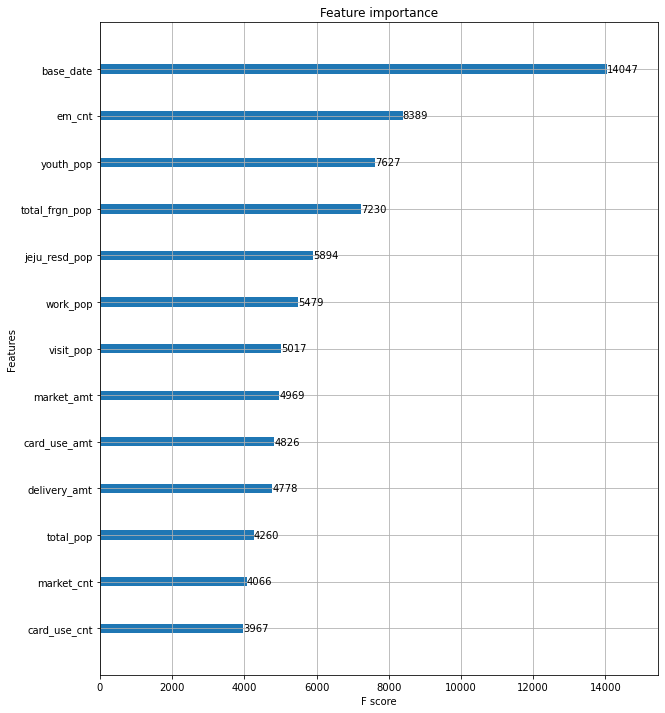

In [333]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)